<a href="https://colab.research.google.com/github/q-viper/Crowd-Density-Counting/blob/master/Real_world_Task_Driven_Testing_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!/usr/bin/python3
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://ucad09e5b54d63ddedbe71d2bffa.dl.dropboxusercontent.com/cd/0/get/Al-EbYp-jN1uhCOO43K6MwjcTnVq7I7MLM2J6ugYQIg56JTP4RzQ_sLyU6nn3VTiW5_-Etz-rBiljlMsCvBEa_VFsH6SLVGFVAVF0kopAbnuNAz5GaawQk8ga3L42VUDMcM/file?dl=1#'
    # Download the file from the URL
zipresp = urlopen(zipurl)
    # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb")
 # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read())
    # Close the newly-created file
tempzip.close()
    # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip")
    # Extract its contents into <extraction_path>
    # note that extractall will automatically create the path
zf.extractall(path = '<extraction_path>')
    # close the ZipFile instance
zf.close()

In [0]:

img_location = '/content/<extraction_path>/RTTS/JPEGImages'

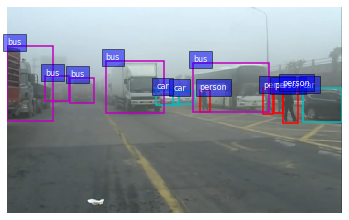

In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Date    : 2017-11-10 00:42:43
# @Author  : Dengpan Fu

import os, sys
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator, Locator
from collections import Counter

FILTER_DIFFICULT = True
SAVE_VIS_IMAGES = True
SHOW = False

COLORMAP = {'person': 'r', 'car': 'c', 'bus': 'm', 
            'bicycle': 'y', 'motorbike': 'g'}

def parse_annotation(path):
    assert(os.path.exists(path)), \
        'Annotation: {} does not exist'.format(path)
    tree = ET.parse(path)
    objs = tree.findall('object')
#     print(objs)
    boxes = []
    count = 0
    for obj in objs:
        bbox = obj.find('bndbox')
        x1 = float(bbox.find('xmin').text) - 1.0
        y1 = float(bbox.find('ymin').text) - 1.0
        x2 = float(bbox.find('xmax').text) - 1.0
        y2 = float(bbox.find('ymax').text) - 1.0
        box = [x1, y1, x2, y2]
        cls = obj.find('name').text.lower().lower()
        difficult = int(obj.find('difficult').text) == 1
        if FILTER_DIFFICULT:
            if not difficult:
                boxes.append({'cls': cls, 'box': box})
                count += 1
        else:
            boxes.append({'cls': cls, 'box': box})
    return boxes

def show_box(im, boxes, show=True, save_path=None):
    im = im[:, :, (2, 1, 0)]
    plt.cla()
    plt.imshow(im)
    counts = [dicts['cls'] for dicts in boxes]
    counts = Counter(counts)
    counts = [f'{count} : {counts[count]}' for count in counts]
#     print(counts)
    for item in boxes:
        box = item['box']
        cls = item['cls']
        
        plt.gca().add_patch(
            plt.Rectangle((box[0], box[1]), 
                            box[2] - box[0], 
                            box[3] - box[1], fill=False, 
                            edgecolor=COLORMAP[cls], 
                            linewidth=1.5))
        plt.text(box[0], box[1]-2, cls, fontsize=8, 
            bbox=dict(facecolor='blue', alpha=0.5), color='white')
    plt.axis('off')
    ax = plt.gca()
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()


if __name__ == '__main__':
    # You should specify the dataset_dir and save_dir according to your own dataset's directory
    dataset_dir = '<extraction_path>/RTTS'
    save_dir = './visualize_gt_boxes'
    dest_files = os.path.join(dataset_dir, 'ImageSets', 'Main', 'test.txt')
    im_dir = os.path.join(dataset_dir, 'JPEGImages')
    anno_dir = os.path.join(dataset_dir, 'Annotations')
    if SAVE_VIS_IMAGES and not os.path.exists(save_dir):
        os.makedirs(save_dir)
    with open(dest_files, 'r') as f:
        names = f.readlines()
    names = [im.strip() for im in names]
    # You can just choose the first N images to visualize their annotations
#     names = names[:15]
    for name in names:
        im_path = os.path.join(im_dir, name + '.png')
        anno_path = os.path.join(anno_dir, name + '.xml')
        assert(os.path.exists(im_path)), \
            'Image: {} does not exist'.format(im_path)
        boxes = parse_annotation(anno_path)
        im = cv2.imread(im_path)
        save_path = None
        if SAVE_VIS_IMAGES:
            save_path = os.path.join(save_dir, name + '.png')
        show_box(im, boxes, show=SHOW, save_path = save_path)

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt
import cv2



In [0]:
images = '<extraction_path>/RTTS/JPEGImages/'
labels = 'visualize_gt_boxes/'

In [0]:
imgs = []
for img in os.listdir(images):
  img = cv2.imread(images + img, 1)
  img = cv2.resize(img, (320, 240))
  imgs.append(img)
#   break

In [0]:
lbls = []
for img in os.listdir(images):
  img = cv2.imread(labels + img, 1)
  img = cv2.resize(img, (320, 240))
  img = img.reshape(320 * 240 * 3)
  lbls.append(img)

(230400,)


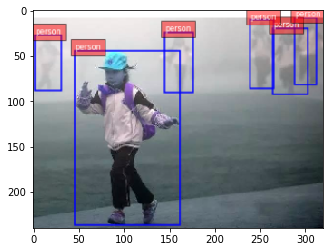

In [24]:
print(lbls[0].shape)

plt.imshow(np.array(lbls[0], dtype = np.int16).reshape(240, 320, 3))

In [0]:
imgs = np.array(imgs, dtype = np.float16)
lbls = np.array(lbls, dtype = np.float16)


In [26]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()


x_train, x_test, y_train, y_test = train_test_split(imgs, lbls, test_size = 0.15) 
x_train, x_test = x_train / 255, x_test / 255
y_train, y_test = y_train / 255, y_test / 255


del imgs
del lbls

import gc
gc.collect()

223

In [27]:
#VGG modified

in_shape = x_train[0].shape
out_shape = y_train[0].shape
# print(out_shape)
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=in_shape))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation = 'linear'))
model.add(Dropout(0.2))

model.add(Dense(2048, activation = 'linear'))
model.add(Dropout(0.2))

model.add(Dense(out_shape[0], activation = 'linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 240, 320, 32)      896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 240, 320, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 240, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 80, 106, 32)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 80, 106, 32)       128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 80, 106, 64)       18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 80, 106, 64)       0         
__________

In [0]:
#Compile the model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer= 'sgd', metrics=['mse', 'mae'])


In [30]:
gc.collect()

198

In [31]:
history = model.fit(x_train, y_train, batch_size= 32, shuffle = True, epochs=5, validation_split = 0.1)

Train on 3305 samples, validate on 368 samples
Epoch 1/5
3305/3305 [==============================] - 57s 17ms/step - loss: 0.3789 - mean_squared_error: 0.3789 - mean_absolute_error: 0.5483 - val_loss: 0.3844 - val_mean_squared_error: 0.3844 - val_mean_absolute_error: 0.5548
Epoch 2/5
3305/3305 [==============================] - 45s 14ms/step - loss: 0.3779 - mean_squared_error: 0.3779 - mean_absolute_error: 0.5478 - val_loss: 0.3838 - val_mean_squared_error: 0.3838 - val_mean_absolute_error: 0.5548
Epoch 3/5
3305/3305 [==============================] - 45s 14ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - mean_absolute_error: 0.5473 - val_loss: 0.3831 - val_mean_squared_error: 0.3831 - val_mean_absolute_error: 0.5548
Epoch 4/5
3305/3305 [==============================] - 45s 14ms/step - loss: 0.3760 - mean_squared_error: 0.3760 - mean_absolute_error: 0.5467 - val_loss: 0.3824 - val_mean_squared_error: 0.3824 - val_mean_absolute_error: 0.5547
Epoch 5/5
3305/3305 [================

In [32]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
print("MSE: ", score[0], " MAE: ", score[1])

649/649 [==============================] - 3s 4ms/step
MSE:  0.36670206980822817  MAE:  0.36670206980822817


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


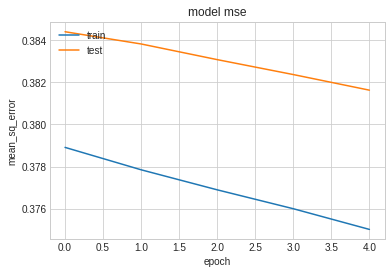

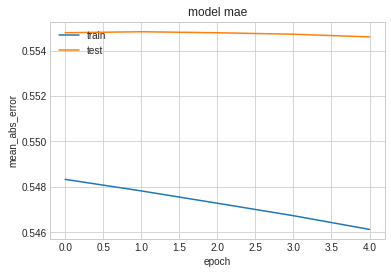

In [33]:
plt.style.use('seaborn-whitegrid')
# list all data in history

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mean_sq_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mean_abs_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

pass1 = [history.history['loss'], history.history['val_loss'], history.history['mean_absolute_error'], history.history['val_mean_absolute_error']]

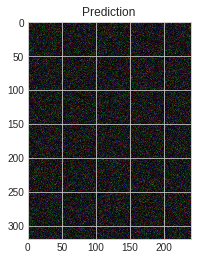

In [39]:
test = np.random.randint(10, len(x_test) - 1, 15, dtype = np.int16)
for i in test:
  img = x_test[i]
  shape = img.shape
  img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
  
  pred = model.predict(img)
  pred = np.absolute(pred)
  pred = pred.reshape(320, 240, 3)
  
#   lbl = y_test[i]
#   plt.subplot(2, 1, 1)
#   plt.imshow(img.reshape(shape))
#   plt.title('Original')
  
#   plt.subplot(2, 1, 2)
  plt.imshow(pred)
  plt.title('Prediction')
  plt.show()
  break